In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'/content'

In [3]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/INeuron/EDA/black_friday/black_friday')

In [4]:
df1=pd.read_csv('blackFriday_train.csv')
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df1.drop(['User_ID'],axis=1,inplace=True)

In [7]:
df1['Gender']=df1['Gender'].map({'F':0,'M':1})
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
df1.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [9]:
df1['Age']=df1['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [10]:
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [11]:
df1.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [12]:
city=pd.get_dummies(df1['City_Category'],drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [13]:
df1=pd.concat([df1,city],axis=1)
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


In [14]:
df1.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [15]:
df1.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [16]:
df1.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [17]:
df1.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [18]:
df1.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [19]:
df1.Product_Category_1.mode()

0    5
dtype: int64

In [20]:
df1.rename(columns={'Product_Category_1':'cat1','Product_Category_2':'cat2','Product_Category_3':'cat3'},inplace=True)

In [21]:
df1['cat2']=df1['cat2'].fillna(df1['cat2'].mode()[0])

In [22]:
df1['cat3']=df1['cat3'].fillna(df1['cat3'].mode()[0])

In [23]:
df1.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
cat1                          0
cat2                          0
cat3                          0
Purchase                      0
B                             0
C                             0
dtype: int64

In [24]:
df1.drop('City_Category',axis=1,inplace=True)

In [25]:
df1.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969,0,1


In [26]:
df1.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [27]:
df1['Stay_In_Current_City_Years']=df1.Stay_In_Current_City_Years.str.replace('+','')

In [28]:
df1.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969,0,1


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   cat1                        550068 non-null  int64  
 7   cat2                        550068 non-null  float64
 8   cat3                        550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int64(6), object(2), uint8(2)
memory usage: 43.0+ MB


In [30]:
df1['Stay_In_Current_City_Years']=df1['Stay_In_Current_City_Years'].astype('int')
df1['B']=df1.B.astype(int)
df1['C']=df1.C.astype(int)

In [31]:
df1.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
cat1                            int64
cat2                          float64
cat3                          float64
Purchase                        int64
B                               int64
C                               int64
dtype: object

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   cat1                        550068 non-null  int64  
 7   cat2                        550068 non-null  float64
 8   cat3                        550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int64  
 11  C                           550068 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 50.4+ MB


In [33]:
df_copy=df1.copy()

In [34]:
df_copy.drop('Product_ID',axis=1,inplace=True)
df_copy.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat1,cat2,cat3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370,0,0
1,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,0,1,10,2,0,12,8.0,16.0,1422,0,0
3,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,1,7,16,4,0,8,8.0,16.0,7969,0,1


## Age vs Purchase
Purchasing of goods of each range of age are almost equal. We can conclude that the percentage of purchasing goods of men over women is higher.

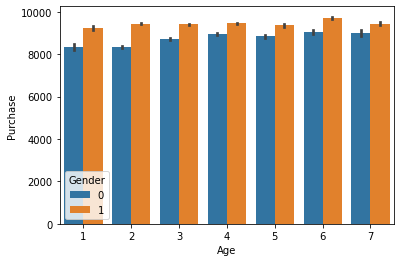

In [40]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df_copy)

## Occupation vs Purchase
All the occupation contributes almost same in purchasing rates and it won't affect alot that how many years you live in a city.

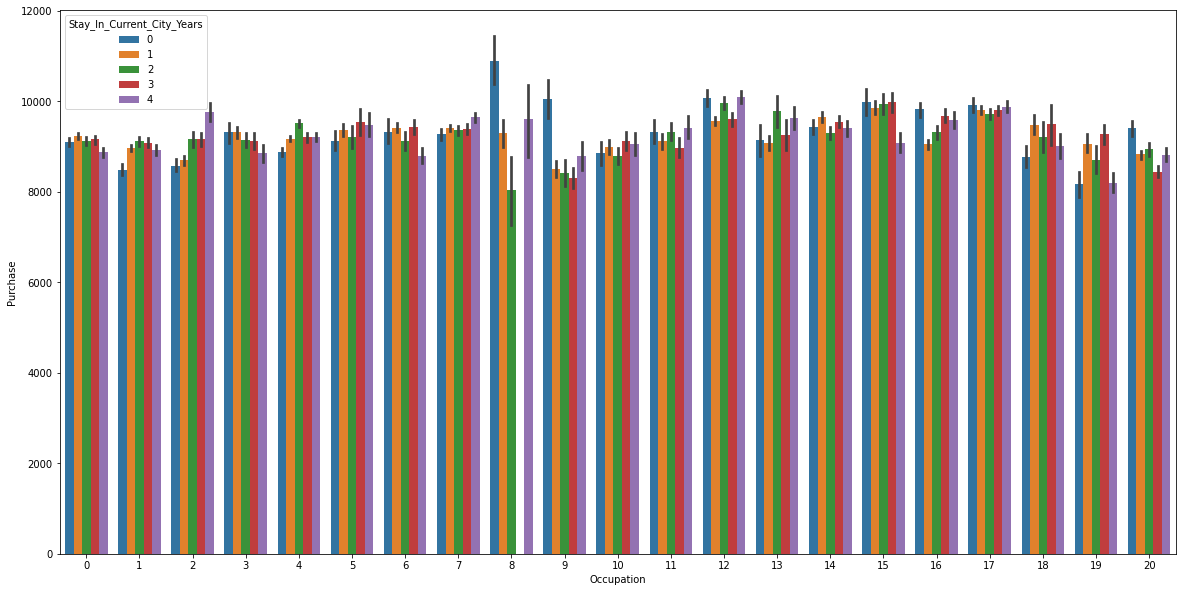

In [42]:
plt.figure(figsize=(20,10))
sns.barplot(x='Occupation',y='Purchase',hue='Stay_In_Current_City_Years',data=df_copy)

## Product_category1 vs Purchased

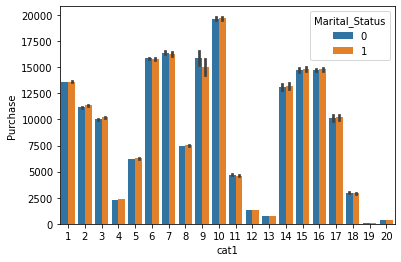

In [43]:
sns.barplot(x='cat1',y='Purchase',hue='Marital_Status',data=df_copy)

## Product_category2 vs Purchased

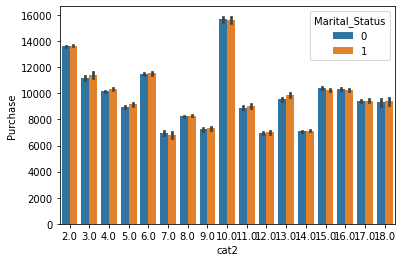

In [44]:
sns.barplot(x='cat2',y='Purchase',hue='Marital_Status',data=df_copy)

## Product _category3 vs Purchased

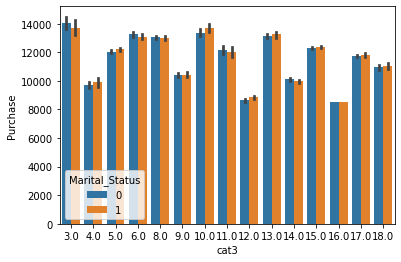

In [45]:
sns.barplot(x='cat3',y='Purchase',hue='Marital_Status',data=df_copy)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not. product category3 is much more purchased by people than product category2 and product category1